# import libraries

In [1]:
# dependencies
import pandas as pd
import re
import spacy
import numpy as np

# read in data and get a first impression of the data we are dealing with

In [2]:
# read in data

df = pd.read_excel('Lamp.xlsm')
df.head(5)

,name,rating,title,date place,variance,type purchase,text review
0,Drew,1.0 out of 5 stars,Arrived Broken - Had to return,"Reviewed in the United States on October 7, 2022",Color: Black,Verified Purchase,I can't really rate the effectiveness of the l...
1,Raven Patterson,5.0 out of 5 stars,love everything about it,"Reviewed in the United States on October 6, 2022",Color: Black,Verified Purchase,very bright! love how its touch sensor too
2,JamesK,5.0 out of 5 stars,Still happy after years of light,"Reviewed in the United States on October 6, 2022",Color: Black,Verified Purchase,I’m so glad to have this. In South Africa we h...
3,Jacklyn Beaudoin,1.0 out of 5 stars,"It’s a piece of junk, should have returned it","Reviewed in the United States on October 6, 2022",Color: Black,Verified Purchase,See above remark
4,Mueed U.,2.0 out of 5 stars,Starts to lean over time,"Reviewed in the United States on October 5, 2022",Color: Black,Verified Purchase,"The light works fine. However, the assembly is..."


In [3]:
# see what a typical text review looks like

df['text review'][2]

'I’m so glad to have this. In South Africa we have blackouts several times daily, and I’ve connected this to my inverter and it makes me happy that it shines during these dark times. It’s easy to use and has three hues of white; warm, cold and something else. My wife loves it and that makes for a happy home.'

# cleaning the data to facilitate data analysis and model fitting

In [4]:
# split dataPlace into 2 columns and append them at the end of dataset

datePlace = df['date place']
place = [re.search('Reviewed in the (.*) on (.*)', datapoint).group(1) for datapoint in datePlace]
date = [re.search('Reviewed in the (.*) on (.*)', datapoint).group(2) for datapoint in datePlace]
df['place'], df['date'] = place, date

In [5]:
# transfor the rating data from string to a %number
# no scientific base in this transformation
# we could also try turning into 5 categories (1-5 star)（or positive/neutral/negative） and later do clustering or classification

rating = [(float(x)-1)/4 for x in df['rating'].str[0:3]]
df['rating%'] = rating

In [6]:
df.loc[(df['rating%'] == 0) | (df['rating%'] == 0.25), 'sentiment'] = 'negative'
df.loc[df['rating%'] == 0.5, 'sentiment'] = 'neutral'
df.loc[(df['rating%'] == 0.75) | (df['rating%'] == 1.0), 'sentiment'] = 'positive'

In [7]:
# convert date to pd datetime format

df['date'] = pd.to_datetime(df['date'])

In [8]:
# fill in any missing comment with 'no comment'

df.loc[df['text review'].isnull(), 'text review'] = 'no comment'

In [9]:
df.head(5)

,name,rating,title,date place,variance,type purchase,text review,place,date,rating%,sentiment
0,Drew,1.0 out of 5 stars,Arrived Broken - Had to return,"Reviewed in the United States on October 7, 2022",Color: Black,Verified Purchase,I can't really rate the effectiveness of the l...,United States,2022-10-07,0.00,negative
1,Raven Patterson,5.0 out of 5 stars,love everything about it,"Reviewed in the United States on October 6, 2022",Color: Black,Verified Purchase,very bright! love how its touch sensor too,United States,2022-10-06,1.00,positive
2,JamesK,5.0 out of 5 stars,Still happy after years of light,"Reviewed in the United States on October 6, 2022",Color: Black,Verified Purchase,I’m so glad to have this. In South Africa we h...,United States,2022-10-06,1.00,positive
3,Jacklyn Beaudoin,1.0 out of 5 stars,"It’s a piece of junk, should have returned it","Reviewed in the United States on October 6, 2022",Color: Black,Verified Purchase,See above remark,United States,2022-10-06,0.00,negative
4,Mueed U.,2.0 out of 5 stars,Starts to lean over time,"Reviewed in the United States on October 5, 2022",Color: Black,Verified Purchase,"The light works fine. However, the assembly is...",United States,2022-10-05,0.25,negative


# preliminary analysis

<Axes: ylabel='rating'>

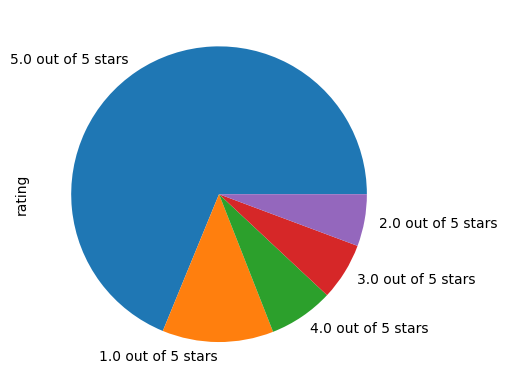

In [10]:
# distribution of ratings

df.rating.value_counts().plot(kind = 'pie')

In [11]:
# people are either very satisfied or very disappointed

<Axes: xlabel='date'>

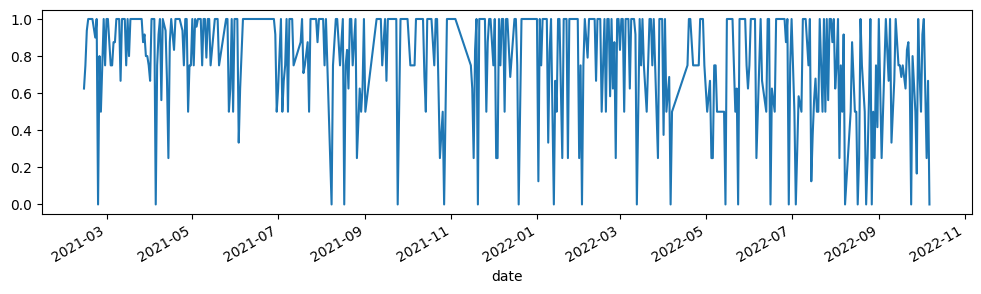

In [12]:
# see if rating drifts with time

longitudinalRating = df['rating%'].groupby(df['date']).mean()
longitudinalRating.plot(figsize = (12, 3))

# rating seems to be divided into 2 periods, with 2021-08 being a watershed
# negative rating before that was sporadic and rare, neutral/negative ratings are more common after that
# further inspection is required to decide what happens before and after 2021-08
# maybe the seller uses a different manufacturer, etc.

# analysis number 1: visualisation of word count groupby positive and negative review

the reasoning behind this analysis is to provide better customer experience. This visualisation gives them a more granular view of the product. Not only can they see the overall rating, they can also know which attributes of the product is appealing and which attributes are problematic, helping them make a better decision.

In [13]:
"""
please ignore this part, we are not using this

# sentence segmentation for every comment and put them into a list (of lists)

# load full english pipeline
nlp = spacy.load('en_core_web_sm')
# nlp = spacy.load('en_core_web_trf') for a larger, slower, but more accurate model (english)

if just want to load some specific pipeline
source_nlp = spacy.load('en_core_web_sm')
nlp = spacy.blank('en')
nlp.add('name of the pipeline', source = source_nlp)

# textReview = df['text review'][df['text review'].notnull()]
textReview = df['text review']

sentSegms = []

for comment in textReview:
    if pd.isnull(comment):
        sentSegms.append('')
        continue
    doc = nlp(comment)
    sentSegm = [sent for sent in doc.sents]
    sentSegms.append(sentSegm)
    
"""

"\nplease ignore this part, we are not using this\n\n# sentence segmentation for every comment and put them into a list (of lists)\n\n# load full english pipeline\nnlp = spacy.load('en_core_web_sm')\n# nlp = spacy.load('en_core_web_trf') for a larger, slower, but more accurate model (english)\n\nif just want to load some specific pipeline\nsource_nlp = spacy.load('en_core_web_sm')\nnlp = spacy.blank('en')\nnlp.add('name of the pipeline', source = source_nlp)\n\n# textReview = df['text review'][df['text review'].notnull()]\ntextReview = df['text review']\n\nsentSegms = []\n\nfor comment in textReview:\n    if pd.isnull(comment):\n        sentSegms.append('')\n        continue\n    doc = nlp(comment)\n    sentSegm = [sent for sent in doc.sents]\n    sentSegms.append(sentSegm)\n    \n"

In [14]:
"""
ignore 

for i in range(10):
    print(sentSegms[i])
    print('\n')
"""

"\nignore \n\nfor i in range(10):\n    print(sentSegms[i])\n    print('\n')\n"

In [17]:
# word tokenization example to inspect the grammar structure of the reviews 

nlp = spacy.load('en_core_web_sm')

textReview = df['text review']

sample_comment = textReview[0]

doc = nlp(sample_comment)
for token in doc:
    print(token, ' | ', token.pos_, ' | ', token.lemma_, ' | ', spacy.explain(token.tag_))
    # print out the token, part of speech, and lemmatized word
    
# the nouns seems to play to more important role in the sentence, they are hinting the topic of the discussion
# notice lamp, assembly, delivery, replacement, they either describe the product or some feature/attribute of the product

I  |  PRON  |  I  |  pronoun, personal
ca  |  AUX  |  can  |  verb, modal auxiliary
n't  |  PART  |  not  |  adverb
really  |  ADV  |  really  |  adverb
rate  |  VERB  |  rate  |  verb, base form
the  |  DET  |  the  |  determiner
effectiveness  |  NOUN  |  effectiveness  |  noun, singular or mass
of  |  ADP  |  of  |  conjunction, subordinating or preposition
the  |  DET  |  the  |  determiner
lamp  |  NOUN  |  lamp  |  noun, singular or mass
as  |  SCONJ  |  as  |  conjunction, subordinating or preposition
it  |  PRON  |  it  |  pronoun, personal
was  |  AUX  |  be  |  verb, past tense
broken  |  VERB  |  break  |  verb, past participle
and  |  CCONJ  |  and  |  conjunction, coordinating
would  |  AUX  |  would  |  verb, modal auxiliary
not  |  PART  |  not  |  adverb
power  |  VERB  |  power  |  verb, base form
on  |  ADP  |  on  |  adverb, particle
upon  |  SCONJ  |  upon  |  conjunction, subordinating or preposition
assembly  |  NOUN  |  assembly  |  noun, singular or mass
.  |  P

In [18]:
# grouping the dataset by sentiment, i.e. 'positive', 'neutral', 'negative'
reviewPositive = df.loc[df['sentiment'] == 'positive', 'text review']
reviewNeutral = df.loc[df['sentiment'] == 'neutral', 'text review']
reviewNegative = df.loc[df['sentiment'] == 'negative', 'text review']

# later we'll be centerize word count, to facilitate that, we need to normalize the count based on the number of positive/neutral/negative reviews
# the reason to centerize word count is because we want to eliminate the influence of some common words that appear in positive/neutral/negative words

lenPositive, lenNeutral, lenNegative = len(reviewPositive), len(reviewNeutral), len(reviewNegative)

In [19]:
# counting nouns and adjectives in comments (groupby sentiment), because they seem to carry the majority of the meaning in a comment

def getWordCount(reviewSet):
    """
    filter out the nouns and adjectives in the review and count each word's appearance
    returns two python dictionary with key: value pair being word: count
    """
    
    nouns, adjectives = {}, {}
    for comment in reviewSet:
        if pd.isnull(comment): continue
        for token in nlp(comment):
            if token.pos_ == 'NOUN': nouns[token.lemma_] = nouns.get(token.lemma_, 0) + 1
            elif token.pos_ == 'ADJ': adjectives[token.lemma_] = adjectives.get(token.lemma_, 0) + 1
    
    return nouns, adjectives

In [20]:
# get noun and adjective word count for positive, neutral, negative reviews respectively

nounsCountPositive, adjectiveCountPositive = getWordCount(reviewPositive)
nounsCountNeutral, adjectiveCountNeutral = getWordCount(reviewNeutral)
nounsCountNegative, adjectiveCountNegative = getWordCount(reviewNegative)

In [21]:
# centerize and normalize (account for # of reviews) the word count 
# there are much more positive reviews than neutral and negative ones

for key, value in nounsCountPositive.items():
    nounsCountPositive[key] = value - (nounsCountNeutral.get(key, 0)*1000/lenNeutral + nounsCountNegative.get(key, 0)*1000/lenNegative + value*1000/lenPositive)*lenPositive/3000
for key, value in adjectiveCountPositive.items():
    adjectiveCountPositive[key] = value - (adjectiveCountNeutral.get(key, 0)*1000/lenNeutral + adjectiveCountNegative.get(key, 0)*1000/lenNegative + value*1000/lenPositive)*lenPositive/3000
for key, value in nounsCountNeutral.items():
    nounsCountNeutral[key] = value - (nounsCountPositive.get(key, 0)*1000/lenPositive + nounsCountNegative.get(key, 0)*1000/lenNegative + value*1000/lenNeutral)*lenNeutral/3000
for key, value in adjectiveCountNeutral.items():
    adjectiveCountNeutral[key] = value - (adjectiveCountPositive.get(key, 0)*1000/lenPositive + adjectiveCountNegative.get(key, 0)*1000/lenNegative + value*1000/lenNeutral)*lenNeutral/3000
for key, value in nounsCountNegative.items():
    nounsCountNegative[key] = value - (nounsCountNeutral.get(key, 0)*1000/lenNeutral + nounsCountPositive.get(key, 0)*1000/lenPositive + value*1000/lenNegative)*lenNegative/3000
for key, value in adjectiveCountNegative.items():
    adjectiveCountNegative[key] = value - (adjectiveCountNeutral.get(key, 0)*1000/lenNeutral + adjectiveCountPositive.get(key, 0)*1000/lenPositive + value*1000/lenNegative)*lenNegative/3000

In [22]:
# convert dict like dataset to pandas dataframe to facilitate plotting

def sortAndDf(data):
    """
    takes in dict-like word count dataset, sort it based on count, convert to pandas dataframe and return
    """
    
    data_sorted = sorted(data.items(), key = lambda x: x[1], reverse = True)
    return pd.DataFrame(data_sorted, columns = ['keyword', 'count'])

nounsCountPositiveDf, adjectiveCountPositiveDf = sortAndDf(nounsCountPositive), sortAndDf(adjectiveCountPositive)
nounsCountNeutralDf, adjectiveCountNeutralDf = sortAndDf(nounsCountNeutral), sortAndDf(adjectiveCountNeutral)
nounsCountNegativeDf, adjectiveCountNegativeDf = sortAndDf(nounsCountNegative), sortAndDf(adjectiveCountNegative)

<Axes: title={'center': 'negative review adjective count'}, ylabel='keyword'>

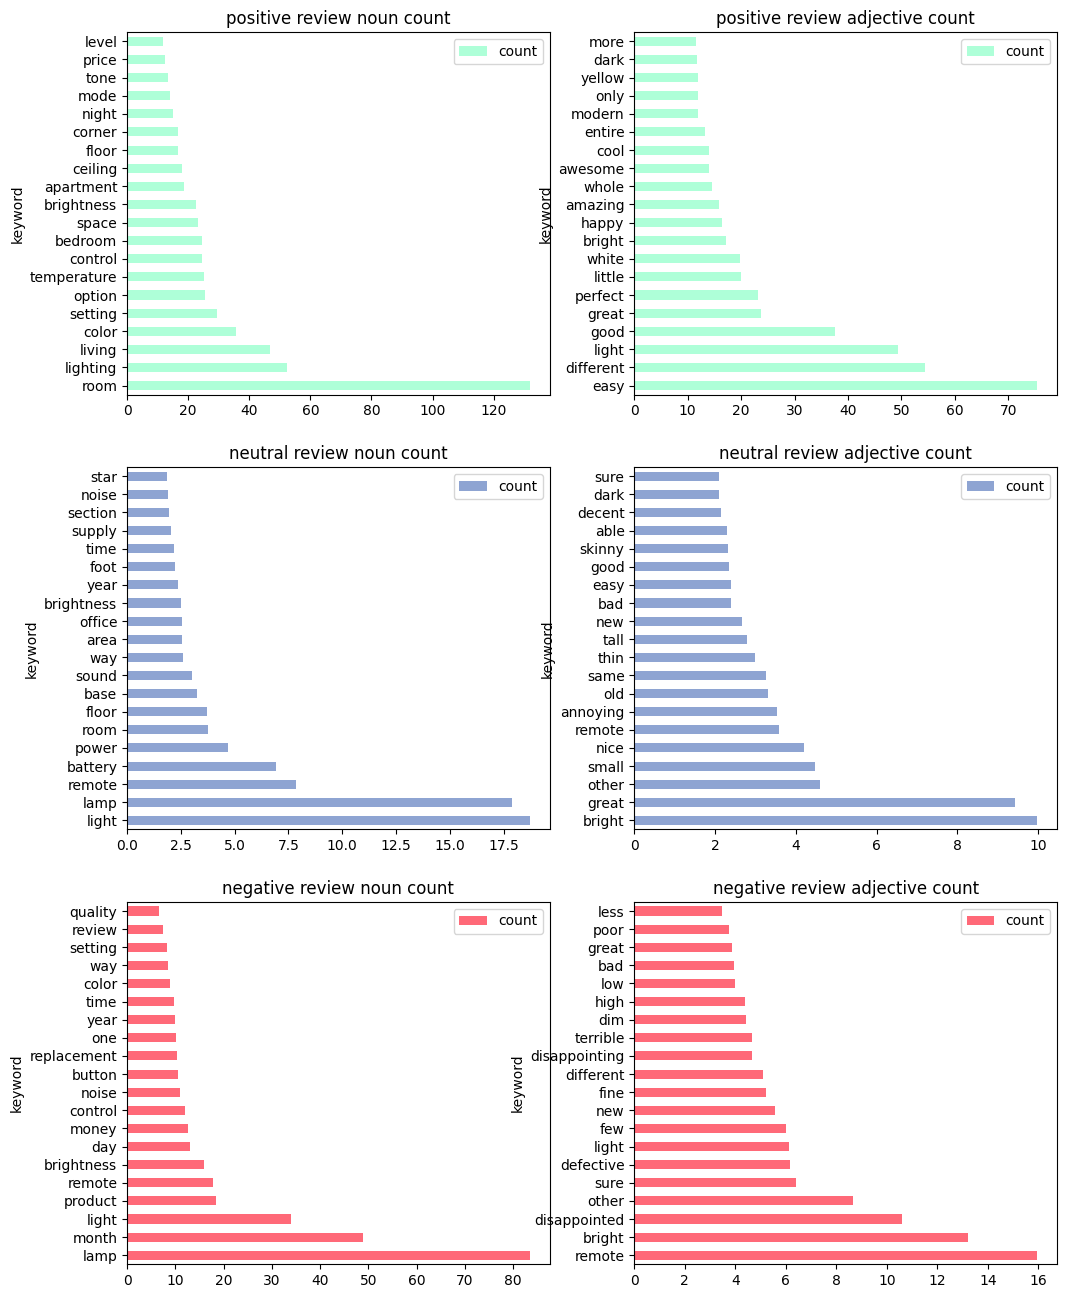

In [23]:
# start plotting
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (12, 16))
nounsCountPositiveDf[:20].plot(x = 'keyword', y = 'count', kind = 'barh', ax = axes[0,0], title = 'positive review noun count', color = (174/255, 255/255, 216/255))
adjectiveCountPositiveDf[:20].plot(x = 'keyword', y = 'count', kind = 'barh', ax = axes[0,1], title = 'positive review adjective count', color = (174/255, 255/255, 216/255))
nounsCountNeutralDf[:20].plot(x = 'keyword', y = 'count', kind = 'barh', ax = axes[1,0], title = 'neutral review noun count', color = (142/255, 164/255, 210/255))
adjectiveCountNeutralDf[:20].plot(x = 'keyword', y = 'count', kind = 'barh', ax = axes[1,1], title = 'neutral review adjective count', color = (142/255, 164/255, 210/255))
nounsCountNegativeDf[:20].plot(x = 'keyword', y = 'count', kind = 'barh', ax = axes[2,0], title = 'negative review noun count', color = (255/255, 105/255, 120/255))
adjectiveCountNegativeDf[:20].plot(x = 'keyword', y = 'count', kind = 'barh', ax = axes[2,1], title = 'negative review adjective count', color = (255/255, 105/255, 120/255))

### some interesting findings:
- color, temperature, control, tone are some of the features customers like about the product
- satisfied customers found the lamp easy (maybe to assemble?)
- customer left neutral reviews mentioned most power and battery, maybe they are not satisfied about it?
- customer left negative reviews mentioned money, maybe they think the product is overpriced?

### some peculiar words definitely require more in depth investigation
- month in negative reviews (what does it mean?)
- why negative review have an overwhelming amount of lamp 

# fitting models to try to predict rating value and to find a better model
### 80% of the data is used as training set, rest as test set

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from textblob import TextBlob
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import MultinomialNB

In [48]:
# 2 types of lemmatization/stemming to choose

def my_tokenizer(text_input):
    """
    tokenize and lemmatize review. i.e. chop a paragraph into individual, no-tense, words
    using nlp library spacy's function
    """
    
    doc = nlp(text_input)
    return [token.lemma_ for token in doc]

def textblob_tokenizer(str_input):
    """
    tokenize and lemmatize, using library textblob
    """
    
    blob = TextBlob(str_input.lower())
    tokens = blob.words
    words = [token.stem() for token in tokens]
    return words

# actual model fitting function

def fitModel(model, vectorizer, response, tokenizer, manual_inspect = False):
    """
    allow user to 
        choose the ML model
        how to vectorize word tokens, currently just CountVectorizer and TF-IDF
        which response to use: continous number, ordinal value
        how to tokenize text: spacy or textblob
        munually inspect some of the reviews in the test set to facilitate improvement
    the function first splits whole dataset into train set and test set
    vectorize tokenized review to a number vector
    fits the model
    the produce predict value
    """
    
    # split data set to training set and test set
    X_train, X_test, y_train, y_test = train_test_split(textReview, df[response], test_size = 0.2, random_state=1)
    
    # transform comment into bag of words/TF-IDF vectorizer
    vec = vectorizer(tokenizer = tokenizer, stop_words = "english" , lowercase = True)
    
    X_train_vec = vec.fit_transform(X_train)
    X_test_vec = vec.transform(X_test)
    
    # fitting model
    
    model_out = model()
    model_out.fit(X_train_vec, y_train)
    
    # predict values

    y_predict = model_out.predict(X_test_vec)
    
    # manually inspect linear regression

    if manual_inspect:
        for i in range(len(X_test)):
            print(X_test.iloc[i])
            print("actual rating: ", y_test.iloc[i])
            print("predicted rating: ", y_predict[i])
            user_input = input("press enter to continue, or q to quit")
            if user_input == 'q':
                break
    
    if model == LinearRegression:
        print("Coefficient of determination, R^2 = ", model_out.score(X_train_vec, y_train))
                
    return model_out, y_predict, y_test

In [26]:
# the only reasoning behind using Linear regression is that our response variable is a continuous variable.
# but the shortcoming is also very obvious, the response variable only ranges from 0 to 1
# logit transformation is not possible because the response value can be 1

model1 = fitModel(LinearRegression, CountVectorizer, 'rating%', my_tokenizer, True)

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


Wow! This lamp solved all of my lighting needs. I cannot believe I didn't discover this lamp sooner. I have 3 other standing lamps that did not light up the new apartment I moved into. Their bulbs were bright and hurt my eyes at night. This lamp was easy to assemble, points upward, looks very sleek, lights up the ENTIRE apartment, and can be adjusted for warmth and brightness. Highly recommended.
1.0
2.334733701878973
press enter to continue, or q to quitq


In [49]:
model2, predict2, y_test_2 = fitModel(LinearRegression, TfidfVectorizer, 'rating%', my_tokenizer, True)

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


Wow! This lamp solved all of my lighting needs. I cannot believe I didn't discover this lamp sooner. I have 3 other standing lamps that did not light up the new apartment I moved into. Their bulbs were bright and hurt my eyes at night. This lamp was easy to assemble, points upward, looks very sleek, lights up the ENTIRE apartment, and can be adjusted for warmth and brightness. Highly recommended.
actual rating:  1.0
predicted rating:  1.264782310143747
press enter to continue, or q to quitq
Coefficient of determination, R^2 =  0.9880164863006766


In [28]:
# linear model behaves very bad just by looking at several prediction on the test set
# most of the predicts over-estimates, probably because data is dominated by 5-star rating (see preliminary analysis)  
# if we have time, may working on improving the predictor variable
# seems TfidfVectorizer performs better than countVectorizer

In [29]:
# Let's try classification
# The multinomial Naive Bayes classifier is suitable for classification with discrete features 
# (e.g., word counts for text classification). The multinomial distribution normally requires integer feature counts.

model3, predict3, y_test_3 = fitModel(MultinomialNB, CountVectorizer, 'sentiment', my_tokenizer, True)

/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/opt/homebrew/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['I', 'far', 'make', 'whereaft'] not in stop_words.
  warnings.warn(


Wow! This lamp solved all of my lighting needs. I cannot believe I didn't discover this lamp sooner. I have 3 other standing lamps that did not light up the new apartment I moved into. Their bulbs were bright and hurt my eyes at night. This lamp was easy to assemble, points upward, looks very sleek, lights up the ENTIRE apartment, and can be adjusted for warmth and brightness. Highly recommended.
positive
positive
press enter to continue, or q to quitq


In [30]:
# human inspection gives an impression that using multinomial Naive Bayes gives a quite accurate prediction
# Let's calculate some evaluation metrics to see if this impression is justified.

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def evaluate(model, predict, y_test):
    """
    prints out some common evaluation metrics to evaluate the model
    """
    accuracy = accuracy_score(y_test, predict)
    precision = precision_score(y_test, predict, average = 'weighted')
    recall = recall_score(y_test, predict, average = 'weighted')
    f1 = f1_score(y_test, predict, average = 'weighted')
    confusion = confusion_matrix(y_test, predict)
    
    print("accuracy: ", accuracy)
    print('precision: ', precision)
    print('recall: ', recall)
    print('f1:', f1)
    print('confusion matrix: ', '\n', confusion)

In [31]:
evaluate(model3, predict3, y_test_3)

accuracy:  0.8109452736318408
precision:  0.7452075510061443
recall:  0.8109452736318408
f1: 0.7740033476773149
confusion matrix:  
 [[ 17   0  17]
 [  3   0  11]
 [  7   0 146]]


/opt/homebrew/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [32]:
# if we just follow maximum likelihood and label everything positive
# we'll have an accuracy rate of 76.12%
# while the model's accuracy is 81.09%, not a small improvement considering the small sample size we are using here
# If we are allowed more time, we can try fine tuning the parameters, train the model on a larger dataset
# or try more sophisticated models that better align with the properties of our dataset.
 
percPositive = y_test_3[y_test_3 == 'positive'].count()/len(y_test_3)
percPositive

0.7611940298507462